In [ ]:
a = 'Male'
b = 'Yes'
if a == 'Male' and a == 'Yes':
    print('Good')
else:
    print('Bad')

In [ ]:
import numpy as np
a = np.array([1,0,0])
b = np.array([1,0,1])
if np.where(a == 1) or np.where(b == 0):
    print("Good")
else:
    print("Bad")

Bit operator

In [ ]:
a == 0

In [ ]:
b == 0

In [ ]:
(a == 0) & (b == 0)

In [ ]:
(a == 0) | (b == 0)

In [ ]:
sex = np.array(['Male','Male','Female'])
survive = np.array(['Yes','Yes','No'])

In [ ]:
sex == 'Male'

In [ ]:
survive == 'Yes'

In [ ]:
(sex == 'Male') & (survive == 'Yes')

In [ ]:
a = np.hstack ( (np.array(['Male','Male','Female']).reshape(3,1), np.array(['Yes','Yes','No']).reshape(3,1)))
a

In [2]:
import numpy as np
titanics = np.genfromtxt('../input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

(array([891., 319.,  42.,   0.,  20.,  22.,   6.,   9.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.75, 4.5 , 5.25, 6.  ]),
 <BarContainer object of 8 artists>)

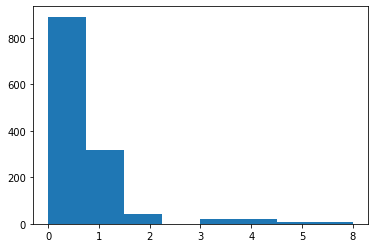

In [3]:
import matplotlib.pyplot as plt
plt.hist(titanics[1:,4], bins=8)

In [ ]:
relative = np.array([float(item) for item in titanics[1:,2]])
survive = titanics[1:,-1]
plt.boxplot([relative[survive=='No'], relative[survive=='Yes'] ], labels = ['die','survive'])

In [4]:
import folium
world_map = folium.Map()
world_map

In [50]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15)
cmu_map

In [ ]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15, tiles='Stamen Terrain')
cmu_map

In [ ]:
folium.TileLayer('Stamen Watercolor').add_to(cmu_map)
cmu_map

In [5]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 98 kB 388 kB/s eta 0:00:01


In [ ]:
location = 'น้ำตกแม่สา'
loc = geocoder.osm(location)
loc.json

In [ ]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map.add_child(Marker(location=latlng, popup="This is waterfall", icon = folium.Icon(color = 'blue', icon = 'home'), tooltip = "Click for more"))
maesa_map

In [64]:
loc = geocoder.osm('สวนสัตว์เชียงใหม่')
folium.CircleMarker(
  location = [loc.lat, loc.lng],
  radius = 50,
  color = '#428bca',
  fill = True,
  fill_color = '#428bca'
).add_to(cmu_map)
cmu_map

# Pandas

In [6]:
import pandas as pd 

In [ ]:
df = pd.read_csv('/kaggle/input/titanic/titanic.txt', sep='\t', header = 0)
df

In [ ]:
df.columns

In [ ]:
df['Name']

In [ ]:
df.iloc[2,0:5]

In [ ]:
df.loc[2,'Passenger Class':'Age']

In [ ]:
df.dtypes

In [ ]:
df['Age'].max()

In [ ]:
df['Age'].min()

In [ ]:
df[df['Age']==df['Age'].min()]

In [ ]:
df['Name'][df['Age']==df['Age'].max()]

In [ ]:
df.shape

In [ ]:
df.values

In [ ]:
df['Label'] = df['Age'] >= 20
df

In [ ]:
df.isnull()

In [ ]:
df.isnull().any()

In [ ]:
df_clean = df
df_clean = df_clean.drop('Cabin',1)
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

In [ ]:
df_clean = df_clean.dropna(1,'any')

In [ ]:
df_clean = df_clean.dropna(0,'any')

In [ ]:
df_clean.isnull().any()

In [ ]:
df_clean['Sex'].unique()

In [ ]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

In [ ]:
p_class, levels = pd.factorize(df_clean['Passenger Class'])
p_class

In [ ]:
levels

In [ ]:
df_clean['Passenger Class'] = p_class
df_clean

In [ ]:
df_clean.dtypes

In [ ]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

In [ ]:
df_clean = df_clean.set_index('Name')
df_clean

In [ ]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

# Ex 1

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_missing = df
df_missing = df_missing.dropna(0,'any')
df_missing

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df_unnecessary = df_missing.drop(['hiv', 'size', 'utmet', 'vgmet', 'surgery', 'pchemo'], axis=1)
df_unnecessary

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [23]:
df_change_age = df_unnecessary
df_change_age.loc[df_change_age['age'] <= 20,'age'] = 'Young'
df_change_age.loc[df_change_age['age'] > 20,'age'] = 'Old'
df_change_age

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [25]:
df_pm0 = df_change_age.loc[ df_change_age['pmmet'] == 0]
df_pm0

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [26]:
df_pm1 = df_change_age.loc[df_change_age['pmmet'] == 1]
df_pm1

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [27]:
pm0_10 = df_pm0.sample(10)
pm0_10

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2998213,Old,2,0.0,0,0.0,5.0,2.0,5.0,5.0,2.0,22.0,5.0,3.0,0.0,0.0,0.0,0.0
3576891,Old,1,0.0,0,0.0,2.0,1.0,4.0,2.5,1.0,22.0,4.0,2.0,0.0,0.0,0.0,0.0
3364537,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,23.0,0.0,2.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
3085074,Old,1,1.0,1,1.0,0.0,5.0,1.0,0.0,2.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0
3211867,Old,2,0.0,0,0.0,3.0,1.0,4.0,3.0,1.0,27.0,3.0,3.0,0.0,0.0,0.0,2.0
3271525,Old,4,0.0,0,0.0,3.0,1.0,4.0,4.0,2.0,16.0,8.0,3.0,0.0,0.0,0.0,2.0
2813350,Old,2,0.0,0,0.0,3.5,1.0,4.0,5.0,2.0,17.0,13.0,3.0,0.0,1.0,0.0,2.0
2651977,Old,1,0.0,0,0.0,2.5,2.0,4.0,2.0,2.0,14.0,0.0,3.0,0.0,0.0,0.0,2.0


In [28]:
pm1_10 = df_pm1.sample(10)
pm1_10

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3730940,Old,3,1.0,0,0.0,4.0,2.0,6.0,4.0,1.0,31.0,2.0,3.0,0.0,1.0,1.0,0.0
2792013,Old,4,1.0,1,0.0,2.0,2.0,4.0,2.0,1.0,24.0,1.0,2.0,0.0,0.0,1.0,0.0
3304085,Old,0,1.0,0,0.0,2.0,2.0,6.0,2.0,1.0,12.0,8.0,3.0,0.0,0.0,1.0,0.0
3255604,Old,2,1.0,1,0.0,3.0,2.0,4.0,3.0,3.0,44.0,9.0,3.0,0.0,1.0,1.0,0.0
3025305,Old,1,1.0,1,0.0,3.0,2.0,6.0,3.0,1.0,26.0,999.0,3.0,0.0,1.0,1.0,0.0
3283111,Old,0,0.0,0,0.0,4.0,2.0,5.0,4.0,1.0,21.0,2.0,3.0,0.0,1.0,1.0,0.0
3311951,Old,2,1.0,0,0.0,3.5,2.0,6.0,2.5,1.0,24.0,999.0,3.0,0.0,0.0,1.0,0.0
2439201,Old,1,0.0,1,0.0,3.0,2.0,4.0,3.0,2.0,20.0,999.0,3.0,0.0,0.0,1.0,0.0
3708356,Old,3,1.0,0,0.0,4.0,1.0,6.0,7.0,1.0,14.0,8.0,3.0,0.0,0.0,1.0,0.0


# Ex 2

<AxesSubplot:xlabel='stage'>

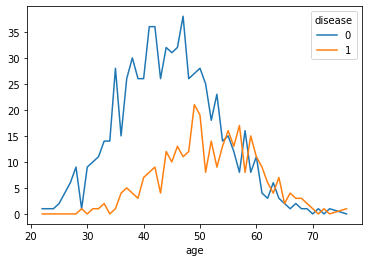

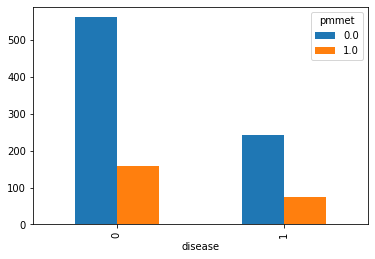

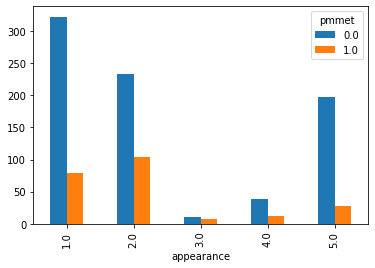

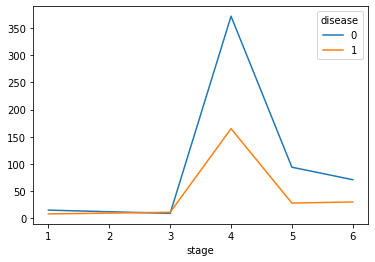

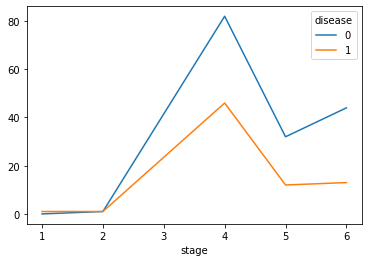

In [48]:
pd.crosstab(df_missing['age'],df_missing['disease']).plot(kind='line')
pd.crosstab(df_change_age['disease'],df_change_age['pmmet']).plot(kind='bar')
pd.crosstab(df_unnecessary['appearance'],df_change_age['pmmet']).plot(kind='bar')
pd.crosstab(df_pm0['stage'],df_change_age['disease']).plot(kind='line')
pd.crosstab(df_pm1['stage'],df_change_age['disease']).plot(kind='line')